In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming 'reviewText' is the column with text data
# Load your dataset
file_path = 'amazon_review.csv'  # Using the file path locally
data = pd.read_csv(file_path)

# Preprocess the text
text_data = data['reviewText'].fillna('')  # Handling missing values if any

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # You can increase max_features based on your needs
tfidf_matrix = vectorizer.fit_transform(text_data)

# Get the words/features from the TF-IDF matrix using the older method
words = vectorizer.get_feature_names()  # Use get_feature_names() instead of get_feature_names_out()

# Convert the matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)

# Display the first few rows of the TF-IDF matrix (Optional)
print(tfidf_df.head())


    00  000  064g   10  100  1080  1080p  10mb   11   12  ...  write  writes  \
0  0.0  0.0   0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0     0.0   
1  0.0  0.0   0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0     0.0   
2  0.0  0.0   0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0     0.0   
3  0.0  0.0   0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0     0.0   
4  0.0  0.0   0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0     0.0   

   writing  written  wrong   xc  year  years  yes      zero  
0      0.0      0.0    0.0  0.0   0.0    0.0  0.0  0.000000  
1      0.0      0.0    0.0  0.0   0.0    0.0  0.0  0.000000  
2      0.0      0.0    0.0  0.0   0.0    0.0  0.0  0.000000  
3      0.0      0.0    0.0  0.0   0.0    0.0  0.0  0.297518  
4      0.0      0.0    0.0  0.0   0.0    0.0  0.0  0.000000  

[5 rows x 1000 columns]


In [3]:
# Calculate the correlation matrix
word_corr_matrix = tfidf_df.corr()

# Display the word correlation matrix (Optional)
print(word_corr_matrix)


             00       000      064g        10       100      1080     1080p  \
00     1.000000  0.024902  0.046874  0.026318  0.015343 -0.002097  0.026061   
000    0.024902  1.000000 -0.002600 -0.002267  0.012711 -0.002872 -0.004117   
064g   0.046874 -0.002600  1.000000  0.060620 -0.002544 -0.002642  0.000051   
10     0.026318 -0.002267  0.060620  1.000000 -0.012740 -0.015322  0.021064   
100    0.015343  0.012711 -0.002544 -0.012740  1.000000 -0.003752 -0.007936   
...         ...       ...       ...       ...       ...       ...       ...   
xc    -0.001916 -0.002625 -0.002415 -0.003155 -0.002869 -0.002667 -0.005643   
year   0.007251  0.004415  0.010869 -0.004815  0.056045 -0.006589  0.000604   
years -0.004946  0.001543  0.011881  0.014630  0.000232 -0.004794 -0.001592   
yes    0.004212 -0.003415 -0.000045  0.000580 -0.004462 -0.003471 -0.007342   
zero   0.042898 -0.003923  0.004854 -0.011653 -0.004922 -0.003987  0.007465   

           10mb        11        12  ...     write 

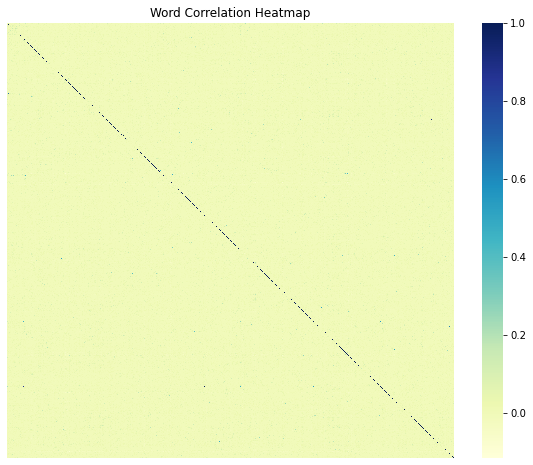

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(word_corr_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)

# Show the heatmap
plt.title('Word Correlation Heatmap')
plt.show()


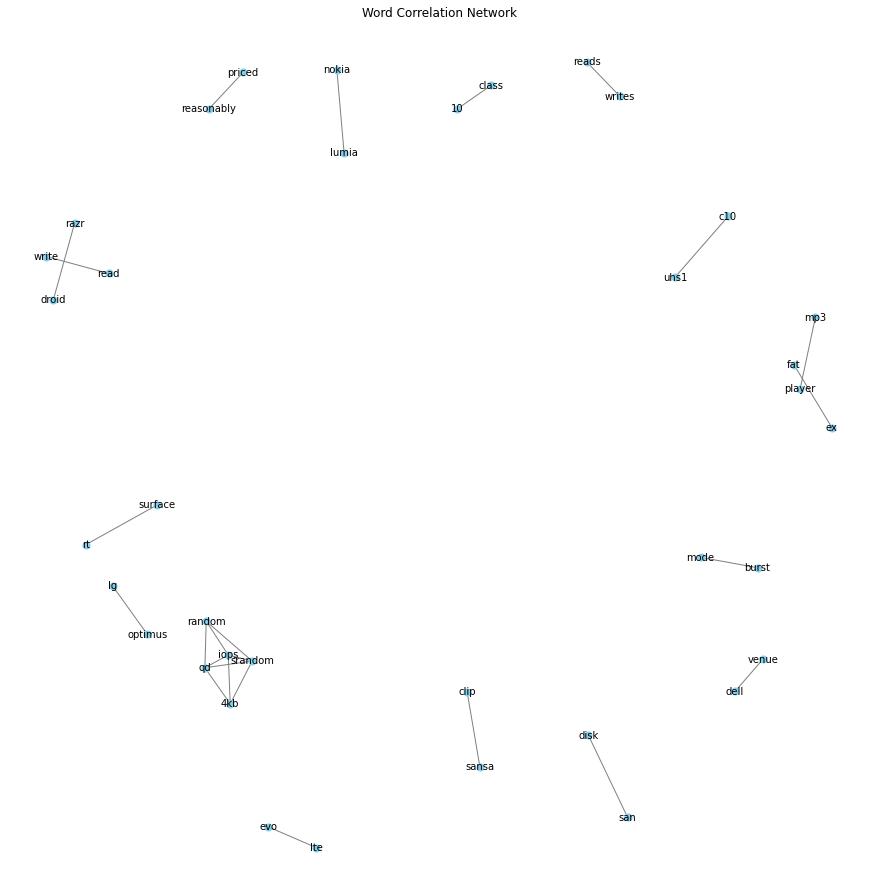

In [5]:
import networkx as nx

# Set a correlation threshold to only include significant correlations
threshold = 0.5

# Create a network graph object
G = nx.Graph()

# Add edges between words with high correlation
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        if word_corr_matrix.iloc[i, j] > threshold:
            G.add_edge(words[i], words[j], weight=word_corr_matrix.iloc[i, j])

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=50, font_size=10, edge_color="gray")

plt.title('Word Correlation Network')
plt.show()
